In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-27 15:12:06.183658: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone14Pro_I(iii) dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals_iPhone14Pro_I_Validate/iPhone14Pro_I_(iii)/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 +0.015625j  0.0234375+0.0078125j 0.0078125+0.0078125j ...
 0.015625 +0.j        0.0078125+0.j        0.015625 +0.0234375j]
2048
83970
(2048, 83970)
[0.01894874 0.00992928 0.00377109 ... 0.00194094 0.00372722 0.00976472]
0
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.0078125+0.015625j  0.0078125+0.015625j  ...
 0.015625 +0.015625j  0.0234375+0.015625j  0.0390625+0.015625j ]
2048
79947
(2048, 79947)
[0.01901123 0.00982715 0.00341399 ... 0.00167948 0.00337034 0.00989594]
1
(20000, 2048)
(20000,)
[0.0234375+0.j        0.03125  +0.0234375j 0.015625 +0.0078125j ...
 0.0078125+0.j        0.0078125+0.015625j  0.0078125+0.0078125j]
2048
82216
(2048, 82216)
[0.01885769 0.00983789 0.00367951 ... 0.00190936 0.00359154 0.00990023]
2
(30000, 2048)
(30000,)
[0.03125  +0.015625j  0.0234375-0.0078125j 0.0078125+0.0234375j ...
 0.0078125+0.015625j  0.0234375-0.0078125j 0.0078125+0.03125j  ]
2048
80825
(2048, 80825)
[0.0188336  0.00983761 0.00379523 ... 0.00184483 0.00339455 0.0098141 ]
3
(40

## Cross-model Validation

## iPhone14Pro_I(i) model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(i)_model.h5")
model.summary()

2023-02-27 15:19:24.575590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 6.1588 - accuracy: 0.1100
test loss, test acc: [6.158792972564697, 0.11004000157117844]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[[ 463 1580  907  109   13    6 1099  712 2810 2301]
 [ 380 1854 1204  148    4    3 1093  611 1928 2775]
 [ 799 1956 1514  320   14    1  833 1084 1431 2048]
 [ 313 2018 1429  188    6    1 1363  926 1479 2277]
 [ 243 2363 1100  187   11    5 1271  757 1692 2371]
 [ 632 1336 1886  473   17    0 1327 1176 1270 1883]
 [ 238 2156  867  157   19    4 1598  751 1954 2256]
 [ 185 2559  755  259    5   13 1595  891 1271 2467]
 [ 492 1572 1076  147   13    2  996  547 2766 2389]
 [ 293 2393 1166  211   21    1 1525  804 1867 1719]]
              precision    recall  f1-score   support

           0       0.11      0.05      0.07     10000
           1       0.09      0.19      0.12     10000
           2       0.13      0.15      0.14     10000
           3       0.09      0.02      0.03     10000
           4       0.09      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.13      0.1

Test Accuracy:0.11004


Text(0.5, 1.0, 'Accuracy:0.110')

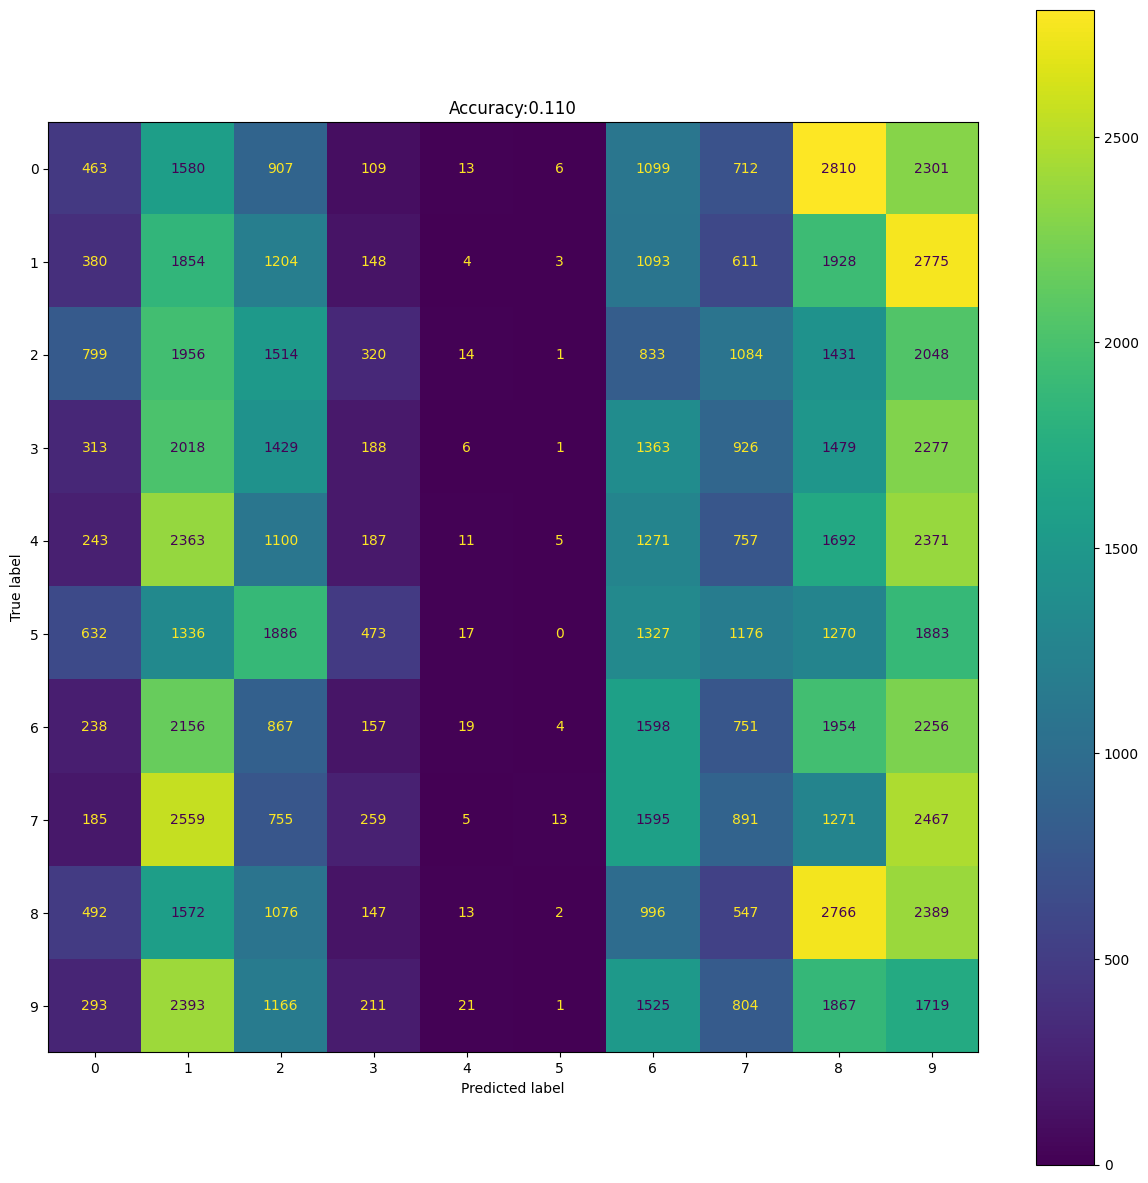

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 15s 5ms/step - loss: 3.8239 - accuracy: 0.1096
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.5183 - accuracy: 0.1296
Epoch 3/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2947 - accuracy: 0.1494
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2543 - accuracy: 0.1606
Epoch 5/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.2419 - accuracy: 0.1646
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.2359 - accuracy: 0.1685
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.2323 - accuracy: 0.1697
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 2.2298 - accuracy: 0.1720
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.2275 - accuracy: 0.1743
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - l

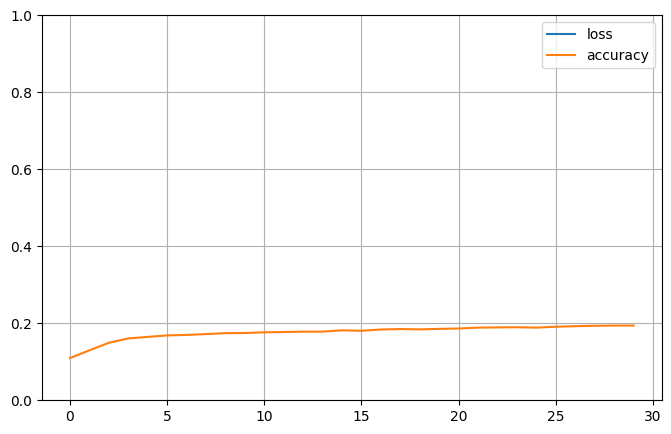

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 2.1995 - accuracy: 0.1941
test loss, test acc: [2.19948410987854, 0.19412000477313995]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[3122 1430  861  104 1023 1406  653  619  341  441]
 [1740 2316  909  107 1253 1561  624  766  331  393]
 [1505 1258 2229  117  924 2240  398  640  231  458]
 [1611 1407  949  266 1410 1971  770  844  176  596]
 [1530 1339  765  103 2286 1489  654  931  280  623]
 [1274 1067 1071  141  911 3754  460  630  234  458]
 [1764 1251  688  144 1407 1426 1385 1007  356  572]
 [1252 1329  773  116 1382 1465  754 2153  215  561]
 [2153 1730  932   91 1130 1459  630  606  774  495]
 [1560 1135  921  122 1454 1722  764  897  298 1127]]
              precision    recall  f1-score   support

           0       0.18      0.31      0.23     10000
           1       0.16      0.23      0.19     10000
           2       0.22      0.22      0.22     10000
           3       0.20      0.03      0.05     10000
           4       0.17      0.23      0.20     10000
           5       0.20      0.38      0.26     10000
           6       0.20      0.1

Test Accuracy:0.19412


Text(0.5, 1.0, 'Accuracy:0.194')

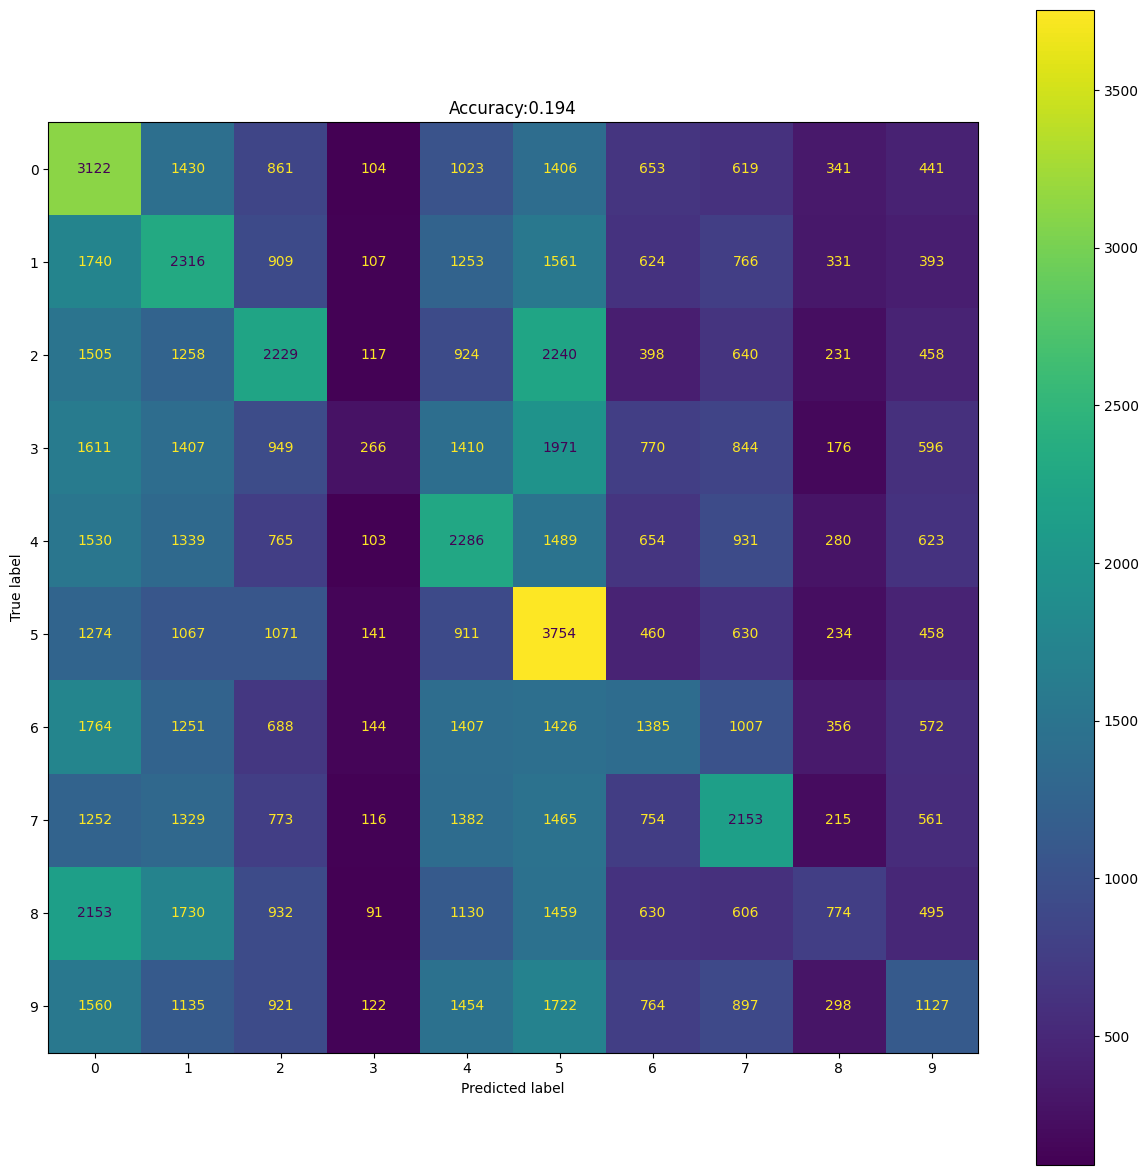

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(ii) model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 6.6321 - accuracy: 0.0904
test loss, test acc: [6.6320695877075195, 0.09036000072956085]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 238  805 1938    0 2283 1766 2185   94  635   56]
 [ 224  795 2608    0 1472 1570 2819   91  385   36]
 [ 707 1521 2042    0 1734  762 1891  360  955   28]
 [ 579 1167 1641    1 2035  881 2490  263  873   70]
 [ 282  716 1309    1 2274 1810 2570  136  789  113]
 [ 742 1726 1777    0 1636  851 1723  328 1190   27]
 [ 372  670 1830    1 2532 1649 1943  101  830   72]
 [ 327  945 2051    0 1804 1181 3011  139  506   36]
 [ 330  801 1743    0 1794 1384 2992  187  708   61]
 [ 380 1025 2163    0 1229 1353 2678  160  967   45]]
              precision    recall  f1-score   support

           0       0.06      0.02      0.03     10000
           1       0.08      0.08      0.08     10000
           2       0.11      0.20      0.14     10000
           3       0.33      0.00      0.00     10000
           4       0.12      0.23      0.16     10000
           5       0.06      0.09      0.07     10000
           6       0.08      0.1

Test Accuracy:0.09036


Text(0.5, 1.0, 'Accuracy:0.090')

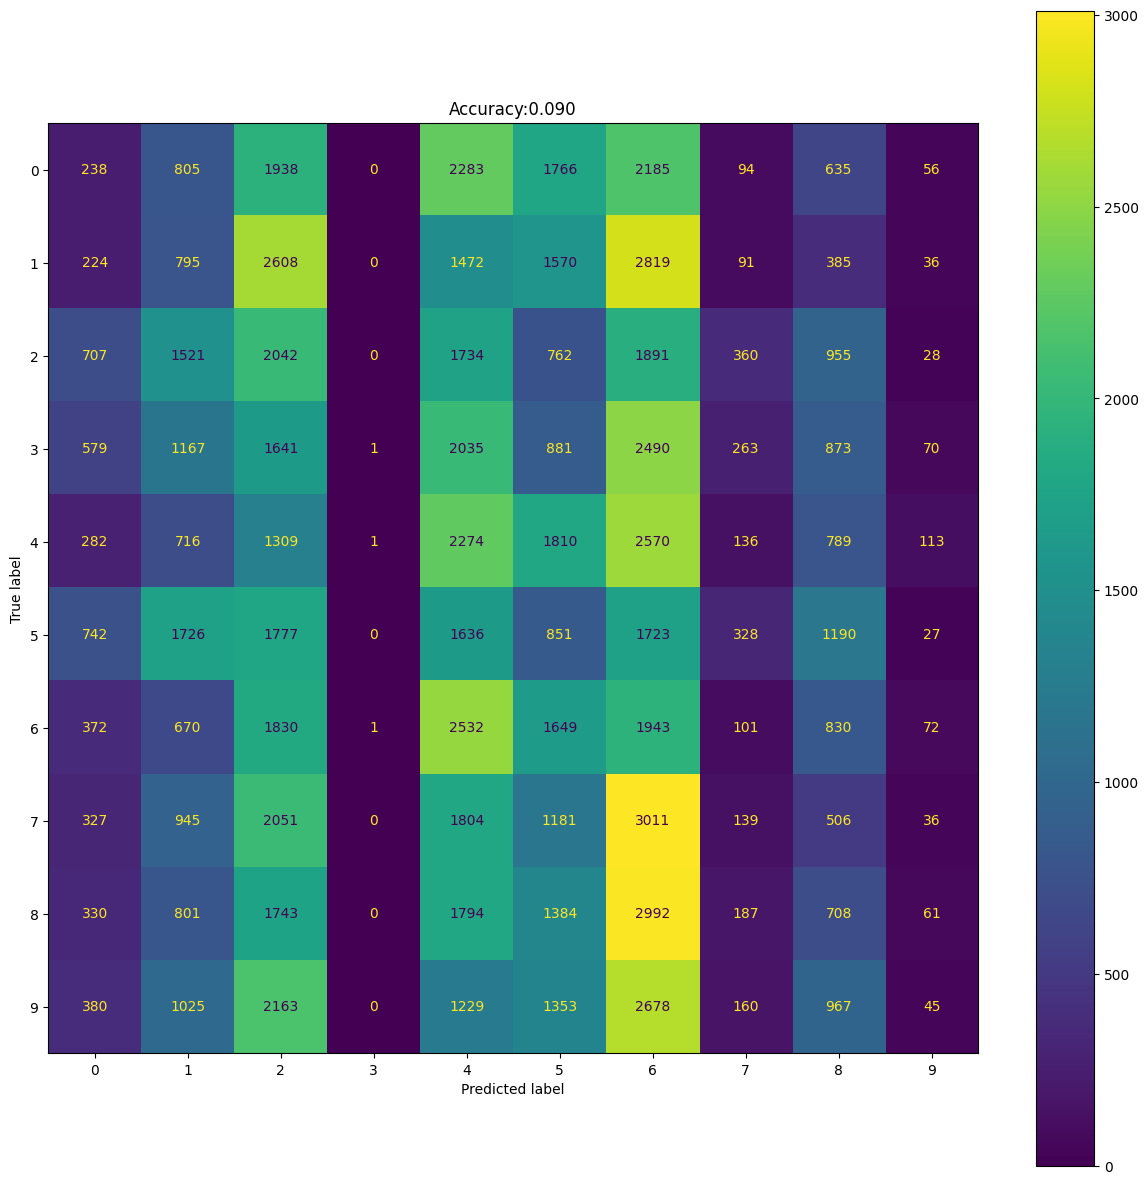

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 3.9018 - accuracy: 0.0983
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.5394 - accuracy: 0.1234
Epoch 3/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.3192 - accuracy: 0.1431
Epoch 4/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2680 - accuracy: 0.1518
Epoch 5/30
3125/3125 [==============================] - 14s 5ms/step - loss: 2.2460 - accuracy: 0.1587
Epoch 6/30
3125/3125 [==============================] - 17s 6ms/step - loss: 2.2345 - accuracy: 0.1639
Epoch 7/30
3125/3125 [==============================] - 17s 6ms/step - loss: 2.2266 - accuracy: 0.1686
Epoch 8/30
3125/3125 [==============================] - 17s 5ms/step - loss: 2.2214 - accuracy: 0.1711
Epoch 9/30
3125/3125 [==============================] - 17s 6ms/step - loss: 2.2167 - accuracy: 0.1761
Epoch 10/30
3125/3125 [==============================] - 17s 5ms/step - l

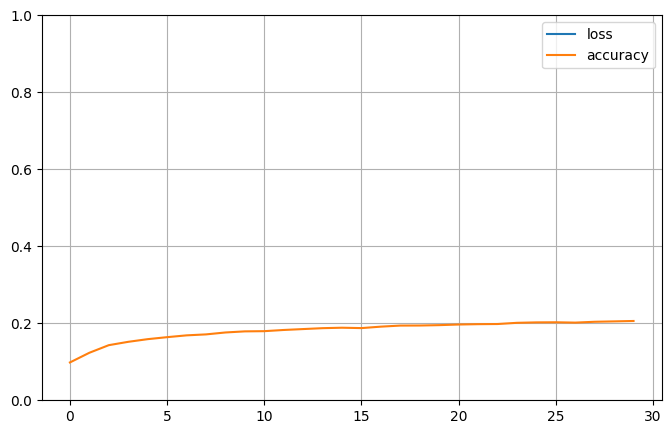

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 2.1725 - accuracy: 0.2065
test loss, test acc: [2.1725258827209473, 0.20649999380111694]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[1944 1581  333  414  726 1284  899  978  310 1531]
 [ 876 3050  361  253  572 1170  757  957  368 1636]
 [ 500  988 1332  580  341 2926  690  637  292 1714]
 [ 652  978  574 1054  660 2299  668  970  407 1738]
 [1025 1287  254  481 1555 1451  997 1013  490 1447]
 [ 483  839  561  496  427 4132  645  719  322 1376]
 [1126 1376  403  421  789 1623 1572  805  400 1485]
 [ 891 1590  282  550  633 1532  590 2068  325 1539]
 [ 814 1473  379  550  790 1541  791  923  861 1878]
 [ 684 1390  418  413  554 1586  653  789  431 3082]]
              precision    recall  f1-score   support

           0       0.22      0.19      0.20     10000
           1       0.21      0.30      0.25     10000
           2       0.27      0.13      0.18     10000
           3       0.20      0.11      0.14     10000
           4       0.22      0.16      0.18     10000
           5       0.21      0.41      0.28     10000
           6       0.19      0.1

Test Accuracy:0.2065


Text(0.5, 1.0, 'Accuracy:0.206')

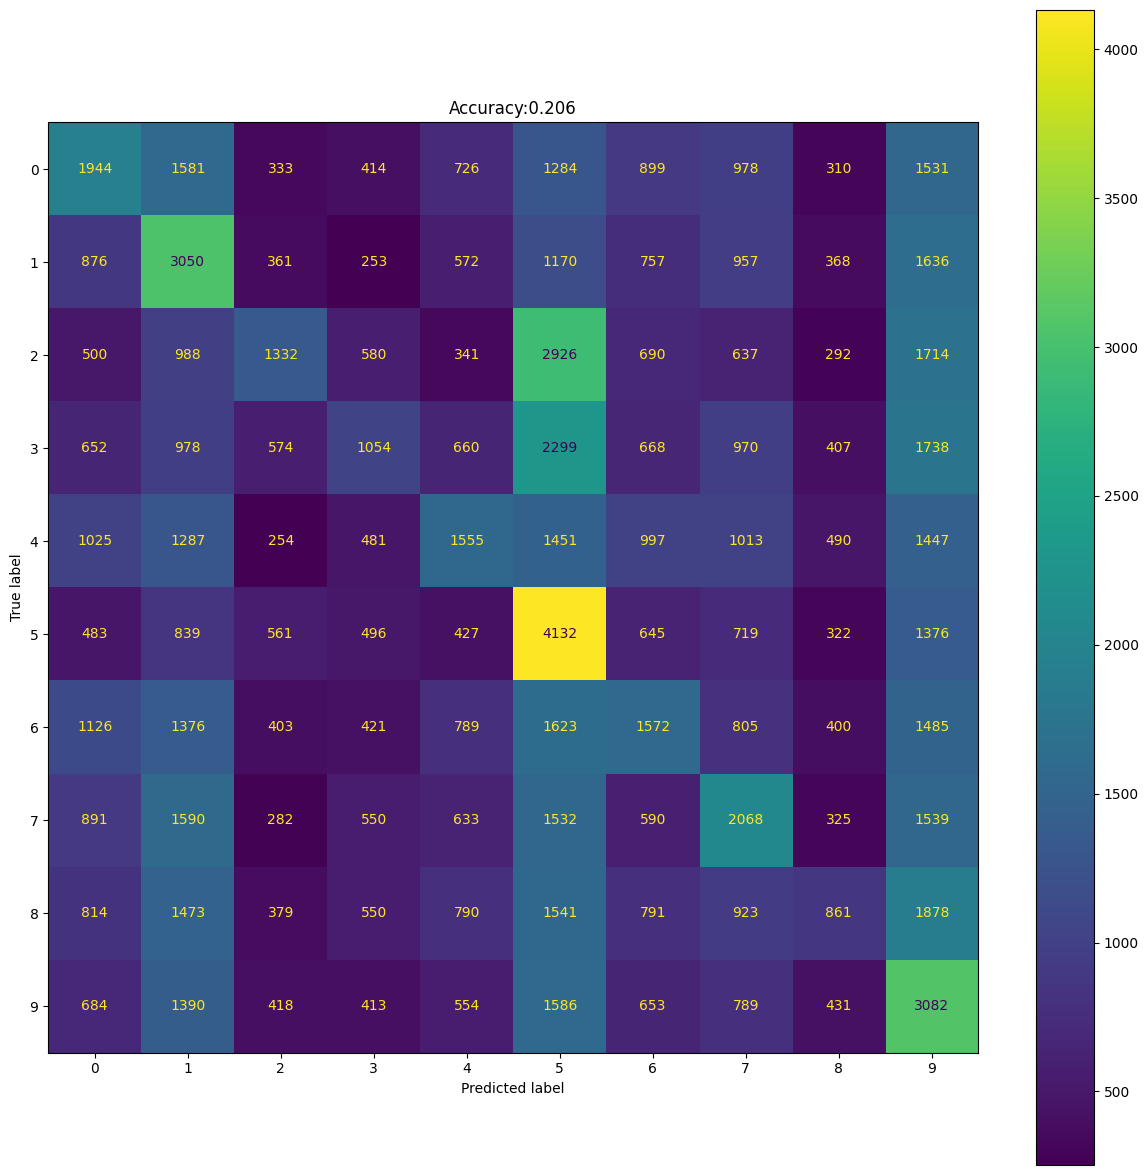

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(iv) model

Cross-model Validation without training

In [24]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(iv)_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [25]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 5.5878 - accuracy: 0.1049
test loss, test acc: [5.587753772735596, 0.10487999767065048]


In [26]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[ 990 1525 1297  602 1385  666 1813 1076  183  463]
 [1661  963 1111  516  744  995 1805 1472  251  482]
 [1201  876 1568  576  575 1200 1247 1293  487  977]
 [ 907 1455 1940  821 1019  818 1633  758  228  421]
 [ 933 1275 1489  572 1510  662 1784  998  291  486]
 [ 881  889 1437  946  784 1102 1549 1005  483  924]
 [1034 1547 1758  303 1221  550 1908 1012  227  440]
 [ 787 1125 1529  944 1335  709 2015  787  294  475]
 [1254 1066  773  598  941  978 1873 1710  294  513]
 [1243 1216 1119  370  756  906 2238 1369  238  545]]
              precision    recall  f1-score   support

           0       0.09      0.10      0.09     10000
           1       0.08      0.10      0.09     10000
           2       0.11      0.16      0.13     10000
           3       0.13      0.08      0.10     10000
           4       0.15      0.15      0.15     10000
           5       0.13      0.11      0.12     10000
           6       0.11      0.1

Test Accuracy:0.10488


Text(0.5, 1.0, 'Accuracy:0.105')

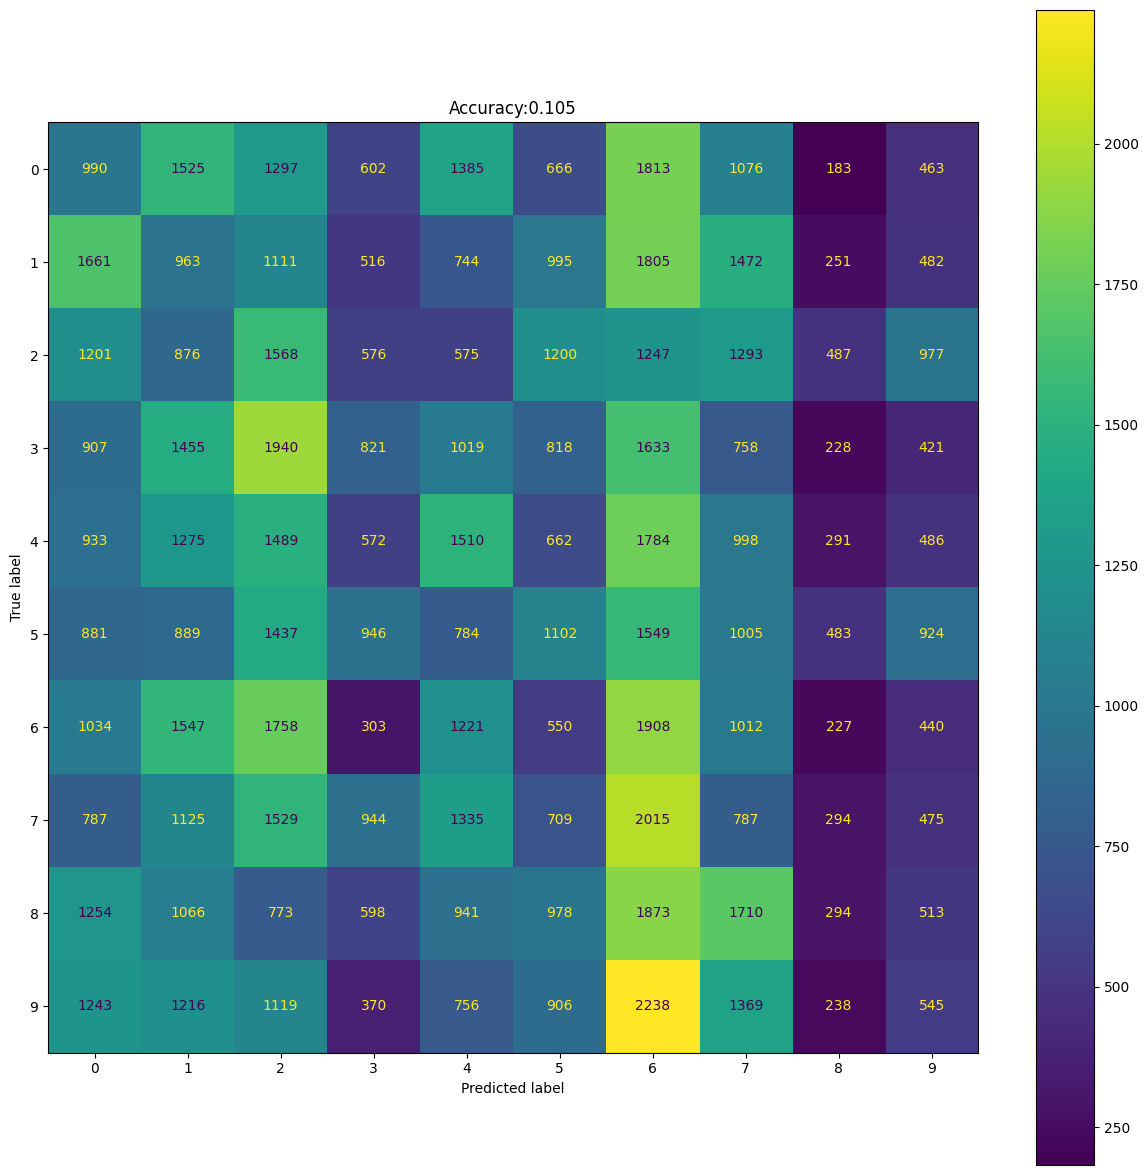

In [27]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [28]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [29]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 4.0042 - accuracy: 0.1137
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.5622 - accuracy: 0.1376
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 2.2972 - accuracy: 0.1562
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2422 - accuracy: 0.1682
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2236 - accuracy: 0.1749
Epoch 6/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.2154 - accuracy: 0.1798
Epoch 7/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2107 - accuracy: 0.1806
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2070 - accuracy: 0.1845
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.2039 - accuracy: 0.1859
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

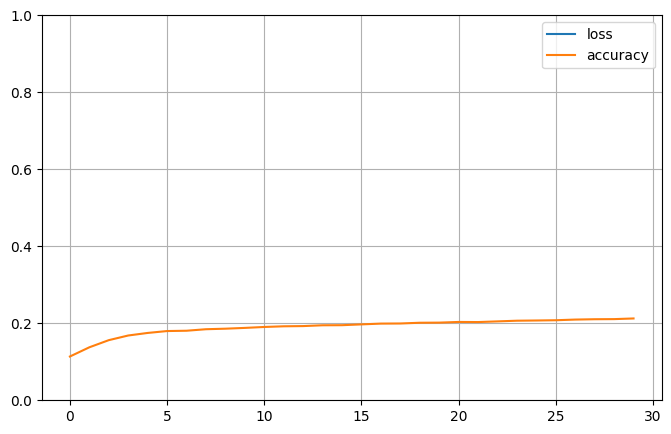

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [32]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 2.1663 - accuracy: 0.2118
test loss, test acc: [2.166348457336426, 0.21184000372886658]


In [33]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[ 893 1920  733  784  589  929 1163 1622  871  496]
 [ 274 3387 1061  634  283  935  761 1223  999  443]
 [ 193 1669 2905  853  333 1422  722  650  903  350]
 [ 299 1524 1173 1965  486  934  986 1508  786  339]
 [ 474 1613  868  949 1005  964 1252 1626  833  416]
 [ 248 1709 1456  730  326 2355  615 1355  879  327]
 [ 458 1624  911  939  623  587 2385 1313  649  511]
 [ 395 1654  675  813  451 1167  806 2900  729  410]
 [ 320 2174 1113  637  406 1097  674 1026 2124  429]
 [ 402 2220 1116  674  374  856 1018 1249  826 1265]]
              precision    recall  f1-score   support

           0       0.23      0.09      0.13     10000
           1       0.17      0.34      0.23     10000
           2       0.24      0.29      0.26     10000
           3       0.22      0.20      0.21     10000
           4       0.21      0.10      0.14     10000
           5       0.21      0.24      0.22     10000
           6       0.23      0.2

Test Accuracy:0.21184


Text(0.5, 1.0, 'Accuracy:0.212')

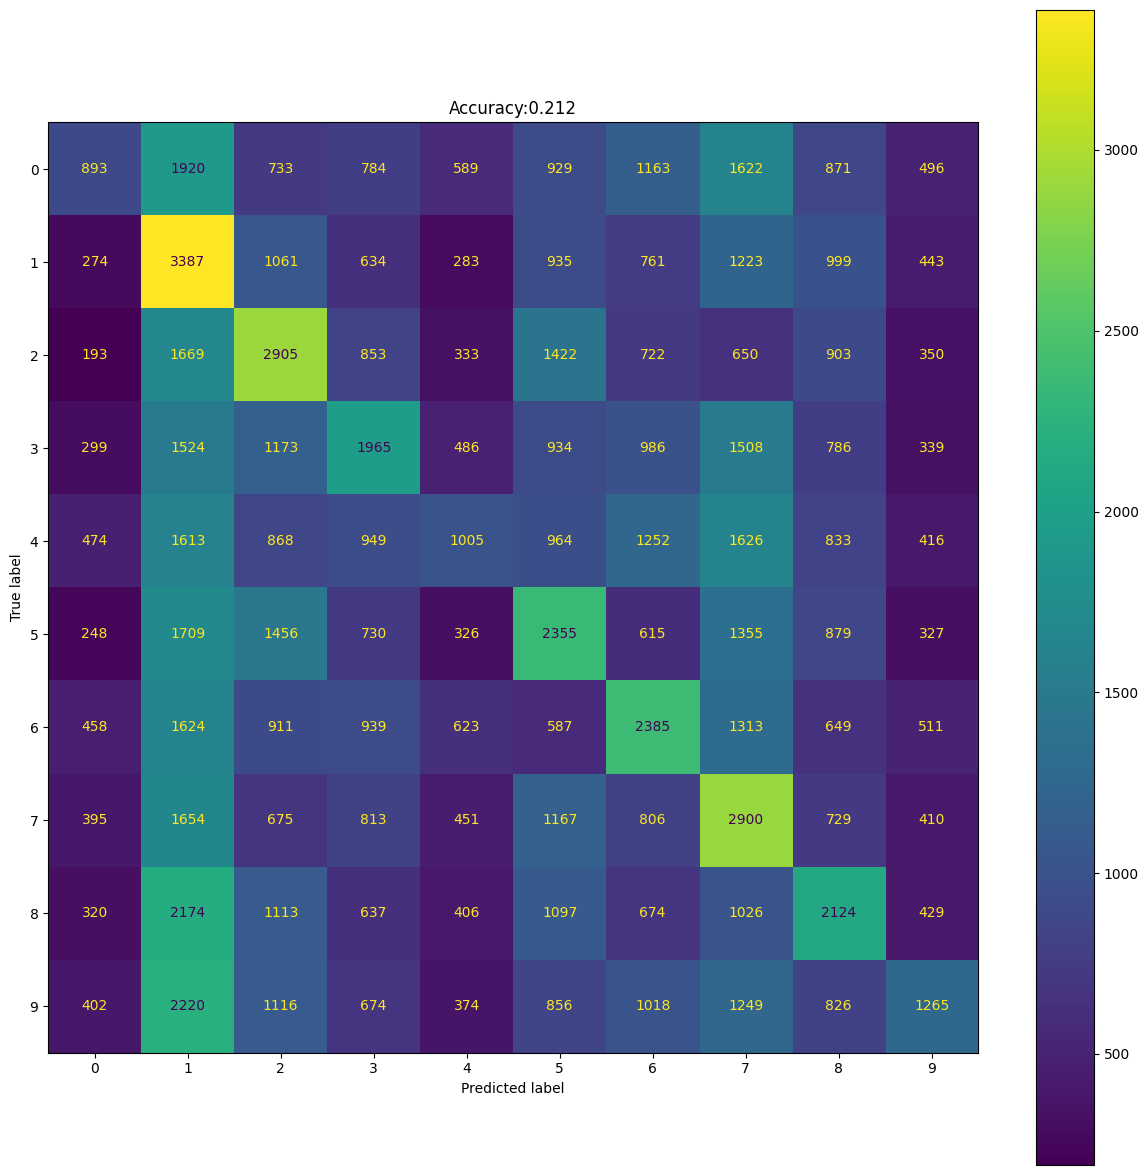

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone14Pro_I(v) model

Cross-model Validation without training

In [35]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone14Pro/iPhone14Pro_Own_Models/iPHONE14Pro_I(v)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [36]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 18.4693 - accuracy: 0.1000
test loss, test acc: [18.469282150268555, 0.09995999932289124]


In [37]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[   9    0    0    0    0    0    4 9987    0    0]
 [  28    0    0    0    0    0    5 9967    0    0]
 [  20    0    0    0    0    0    6 9974    0    0]
 [  33    0    0    0    0    0    6 9961    0    0]
 [   8    0    0    0    0    0    3 9989    0    0]
 [  17    0    0    0    0    0   13 9970    0    0]
 [  37    0    0    0    0    0   18 9945    0    0]
 [  24    0    0    0    0    0    7 9969    0    0]
 [   7    0    0    0    0    0    5 9988    0    0]
 [  14    0    0    0    0    0    6 9980    0    0]]
              precision    recall  f1-score   support

           0       0.05      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.25      0.0

Test Accuracy:0.09996


Text(0.5, 1.0, 'Accuracy:0.100')

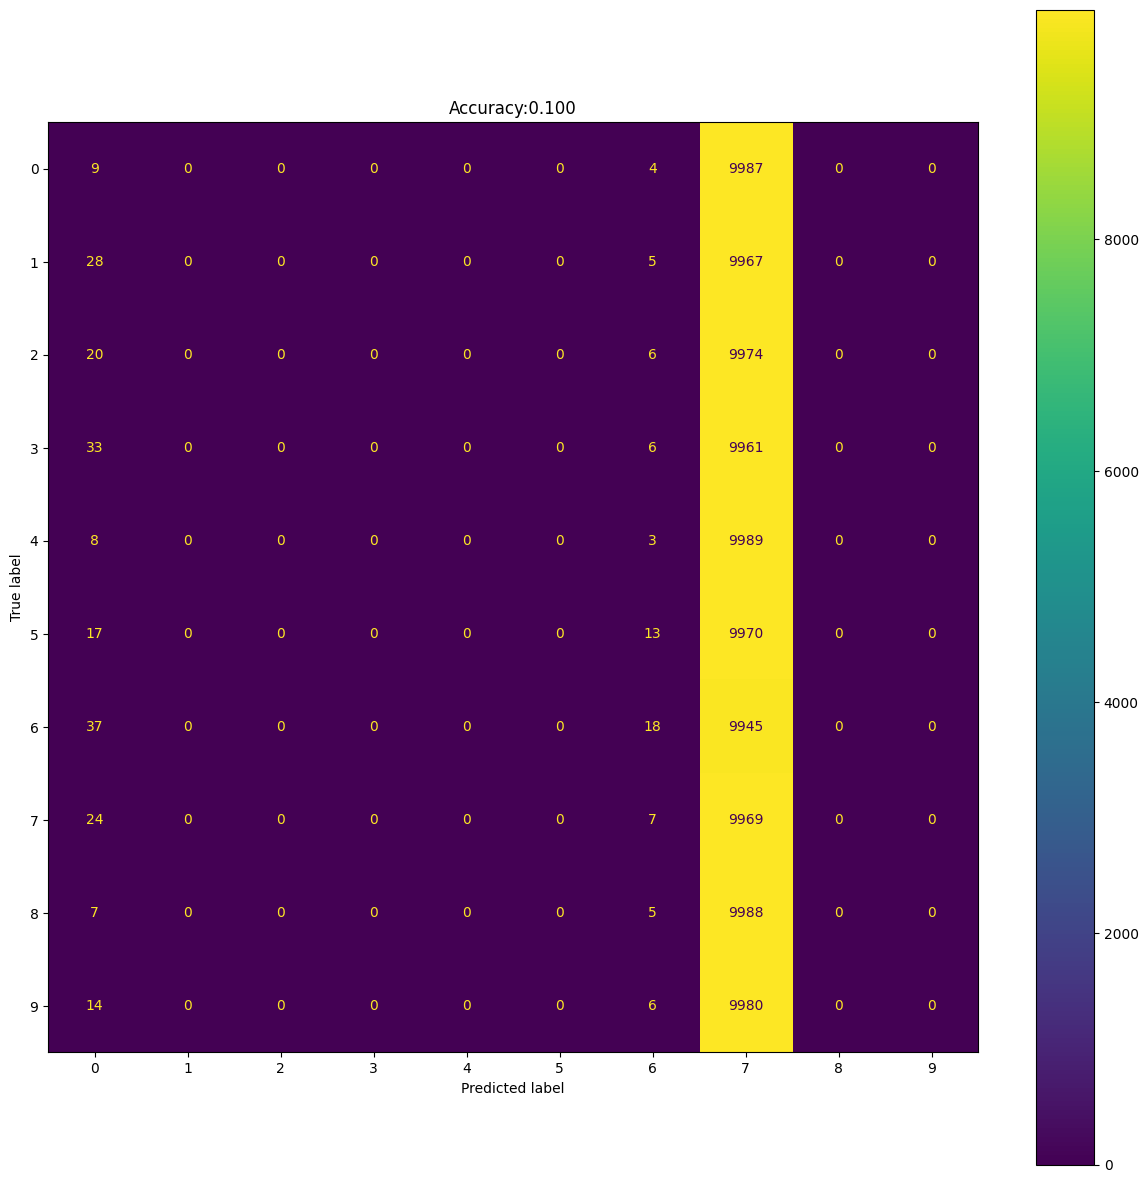

In [38]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [39]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [41]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2567 - accuracy: 0.1570
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.2557 - accuracy: 0.1572
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.2542 - accuracy: 0.1594
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2538 - accuracy: 0.1598
Epoch 5/30
3125/3125 [==============================] - 12s 4ms/step - loss: 2.2520 - accuracy: 0.1614
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2510 - accuracy: 0.1609
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2502 - accuracy: 0.1636
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2493 - accuracy: 0.1629
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 2.2477 - accuracy: 0.1651
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

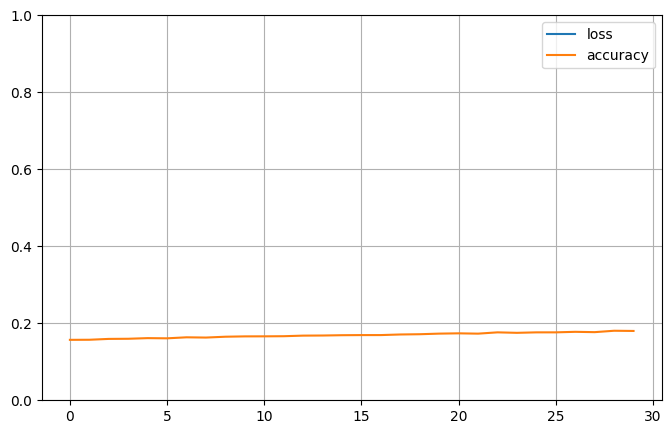

In [42]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [43]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 2.2351 - accuracy: 0.1796
test loss, test acc: [2.23511004447937, 0.17964999377727509]


In [44]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[1442   76  951  115  697  990  926 3817  858  128]
 [ 776  279 1247  190  537 1183 1246 3715  691  136]
 [ 589   51 2845  126  474  853  989 3280  641  152]
 [ 726   80 1531  428  482 1118  994 3605  862  174]
 [ 857   68 1152  123 1193  986  977 3714  737  193]
 [ 664   54 1203  145  505 2057  973 3439  835  125]
 [ 578   62 1284  135  458 1010 2017 3508  812  136]
 [ 607   33  845  131  428  787  830 5677  559  103]
 [ 776   57 1016  157  518 1211 1095 3300 1687  183]
 [ 691   45 1139  142  581 1161  957 4164  780  340]]
              precision    recall  f1-score   support

           0       0.19      0.14      0.16     10000
           1       0.35      0.03      0.05     10000
           2       0.22      0.28      0.25     10000
           3       0.25      0.04      0.07     10000
           4       0.20      0.12      0.15     10000
           5       0.18      0.21      0.19     10000
           6       0.18      0.2

Test Accuracy:0.17965


Text(0.5, 1.0, 'Accuracy:0.180')

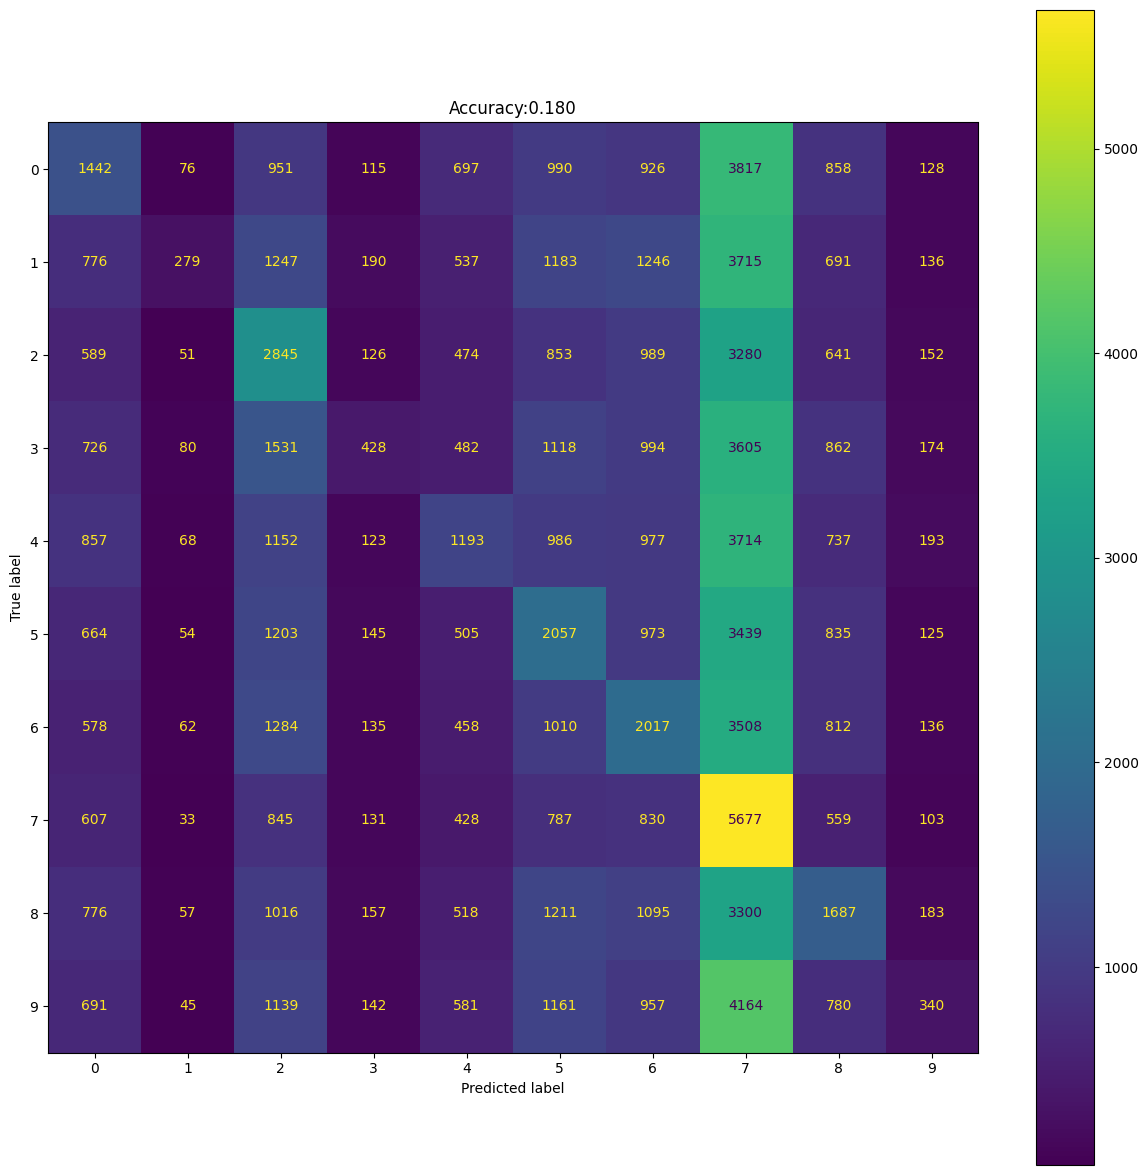

In [45]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')